In [1]:
import pandas as pd

from git_root import git_root
my_git_root = git_root()

In [2]:
data_sources_path = f'{my_git_root}/data/data_sources.csv'

In [3]:
df = pd.read_csv(data_sources_path)

In [4]:
df

,name,country,has_url,type,url
0,Fachhochschule JOANNEUM,Austria,True,pdf,https://cdn.fh-joanneum.at/media/2021/10/Infor...
1,Johannes Kepler University Linz,Austria,True,pdf,https://www.jku.at/fileadmin/gruppen/56/Downlo...
2,Medizinische Universität Graz,Austria,True,pdf,https://www.medunigraz.at/frontend/user_upload...
3,Medizinische Universität Wien,Austria,True,pdf,https://www.meduniwien.ac.at/web/fileadmin/con...
4,Technical University Vienna,Austria,True,pdf,https://www.tuwien.at/index.php?eID=dms&s=4&pa...
...,...,...,...,...,...
2367,University of Warwick,United Kingdom,NaN,NaN,NaN
2368,"Warburg Institute, University of London",United Kingdom,NaN,NaN,NaN
2369,Warnborough University,United Kingdom,NaN,NaN,NaN
2370,William Gilbert College,United Kingdom,NaN,NaN,NaN


In [5]:
df[['has_url']] = df[['has_url']].fillna('not looked')

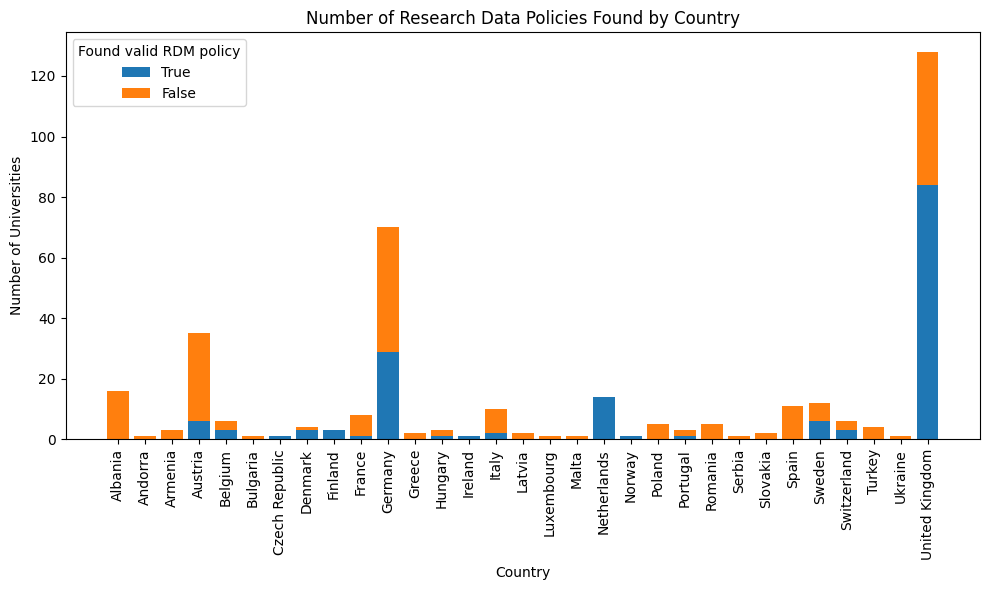

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

df_filtered = df[df['has_url'].isin([True, False])]

true_counts = []
false_counts = []

countries = sorted(df_filtered['country'].unique())

for country in countries:
    mask = df_filtered['country'] == country
    df_filtered_mask = df_filtered[mask]
    true_count = df_filtered_mask['has_url'].to_list().count(True)
    true_counts.append(true_count)
    false_count = df_filtered_mask['has_url'].to_list().count(False)
    false_counts.append(false_count)

boolean_counts = {
    'True': true_counts,
    'False': false_counts
}

bottom = np.zeros(len(countries))

for boolean, count in boolean_counts.items():
    p = ax.bar(countries, count, label=boolean, bottom = bottom)
    bottom += count

ax.set_title('Number of Research Data Policies Found by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Universities')
ax.set_xticks(countries)
ax.set_xticklabels(countries, rotation=90)
ax.legend(title='Found valid RDM policy')
plt.tight_layout()
plt.savefig(f'{my_git_root}/notebooks/images/dataset_curation/num_RDM_per_country.svg', dpi=300)
plt.show()


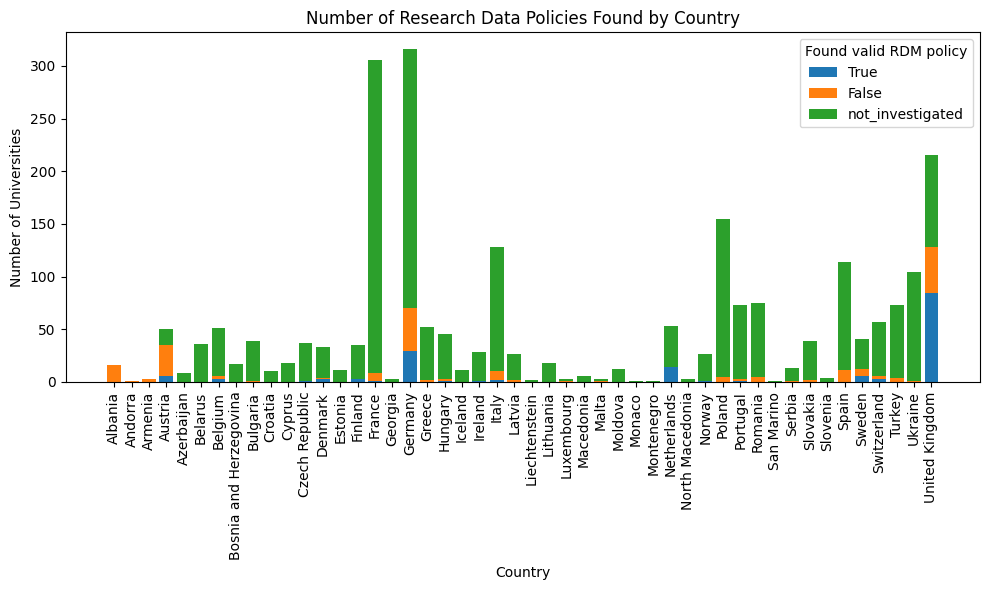

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

df_filtered = df[df['has_url'].isin([True, False, 'not looked'])]

true_counts = []
false_counts = []
not_investigated_counts = []

countries = sorted(df_filtered['country'].unique())

for country in countries:
    mask = df_filtered['country'] == country
    df_filtered_mask = df_filtered[mask]
    true_count = df_filtered_mask['has_url'].to_list().count(True)
    true_counts.append(true_count)
    false_count = df_filtered_mask['has_url'].to_list().count(False)
    false_counts.append(false_count)
    not_investigated_count = df_filtered_mask['has_url'].to_list().count('not looked')
    not_investigated_counts.append(not_investigated_count)

boolean_counts = {
    'True': true_counts,
    'False': false_counts,
    'not_investigated': not_investigated_counts
}

bottom = np.zeros(len(countries))

for boolean, count in boolean_counts.items():
    p = ax.bar(countries, count, label=boolean, bottom = bottom)
    bottom += count

ax.set_title('Number of Research Data Policies Found by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Universities')
ax.set_xticks(countries)
ax.set_xticklabels(countries, rotation=90)
ax.legend(title='Found valid RDM policy')
plt.tight_layout()
plt.savefig(f'{my_git_root}/notebooks/images/dataset_curation/num_RDM_per_country_not_investigated.svg', dpi=300)
plt.show()
